In [1]:
# !pip install numpy pandas matplotlib seaborn

In [82]:
import pandas as pd
df_train = pd.read_csv(r"F:\New folder\au_train.csv")


In [83]:
df_train.head(10)

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3      Married-civ-spouse   Handlers-cleaners         Husband   Black   
4      Married-civ-spouse      Prof-specialty            Wife   Black   
5      Married-civ-spouse     Exec-managerial            Wife   White   
6   Married-spouse-absent       Other-service   Not-in-family   Black   
7      Married-civ-spouse     Exec-managerial         Husband   White   
8           Never-married      Prof-specialty   Not-in-family   White   
9      Married-civ-spouse     Exec-managerial         Husband   White   

       sex  capital-gain  capital-loss  hours-per-week  native-country   class  
0     Male          2174             0              40   United-States   <=50K  
1     Male             0             0              13   United-States   <=50K  
2     Male             0             0              40   United-States   <=50K  
3     Male             0             0              40   United-States   <=50K  
4   Female             0             0              40            Cuba   <=50K  
5   Female             0             0              40   United-States   <=50K  
6   Female             0             0              16         Jamaica   <=50K  
7     Male             0             0              45   United-States    >50K  
8   Female         14084             0              50   United-States    >50K  
9     Male          5178             0              40   United-States    >50K

# Basic EDA

In [84]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# No null Enteries

In [85]:
df_test = pd.read_csv(r"F:\New folder\au_test.csv")

In [86]:
df_test.head(10)

age          workclass  fnlwgt      education  education-num  \
0   25            Private  226802           11th              7   
1   38            Private   89814        HS-grad              9   
2   28          Local-gov  336951     Assoc-acdm             12   
3   44            Private  160323   Some-college             10   
4   18                  ?  103497   Some-college             10   
5   34            Private  198693           10th              6   
6   29                  ?  227026        HS-grad              9   
7   63   Self-emp-not-inc  104626    Prof-school             15   
8   24            Private  369667   Some-college             10   
9   55            Private  104996        7th-8th              4   

        marital-status          occupation    relationship    race      sex  \
0        Never-married   Machine-op-inspct       Own-child   Black     Male   
1   Married-civ-spouse     Farming-fishing         Husband   White     Male   
2   Married-civ-spouse     Protective-serv         Husband   White     Male   
3   Married-civ-spouse   Machine-op-inspct         Husband   Black     Male   
4        Never-married                   ?       Own-child   White   Female   
5        Never-married       Other-service   Not-in-family   White     Male   
6        Never-married                   ?       Unmarried   Black     Male   
7   Married-civ-spouse      Prof-specialty         Husband   White     Male   
8        Never-married       Other-service       Unmarried   White   Female   
9   Married-civ-spouse        Craft-repair         Husband   White     Male   

   capital-gain  capital-loss  hours-per-week  native-country    class  
0             0             0              40   United-States   <=50K.  
1             0             0              50   United-States   <=50K.  
2             0             0              40   United-States    >50K.  
3          7688             0              40   United-States    >50K.  
4             0             0              30   United-States   <=50K.  
5             0             0              30   United-States   <=50K.  
6             0             0              40   United-States   <=50K.  
7          3103             0              32   United-States    >50K.  
8             0             0              40   United-States   <=50K.  
9             0             0              10   United-States   <=50K.

### What is "?" , lets remove it

In [87]:
# Strip whitespace and ensure string type
df_train['workclass'] = df_train['workclass'].astype(str).str.strip()

# (Optional) Print unique values to verify
print(df_train['workclass'].unique())

# Remove rows where workclass is '?'
df_train = df_train[df_train['workclass'] != '?']


['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [88]:
# Strip whitespace and ensure string type
df_test['workclass'] = df_test['workclass'].astype(str).str.strip()

# (Optional) Print unique values to verify
print(df_test['workclass'].unique())

# Remove rows where workclass is '?'
df_test = df_test[df_test['workclass'] != '?']


['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [89]:
df_test.head()

age  workclass  fnlwgt      education  education-num       marital-status  \
0   25    Private  226802           11th              7        Never-married   
1   38    Private   89814        HS-grad              9   Married-civ-spouse   
2   28  Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44    Private  160323   Some-college             10   Married-civ-spouse   
5   34    Private  198693           10th              6        Never-married   

           occupation    relationship    race    sex  capital-gain  \
0   Machine-op-inspct       Own-child   Black   Male             0   
1     Farming-fishing         Husband   White   Male             0   
2     Protective-serv         Husband   White   Male             0   
3   Machine-op-inspct         Husband   Black   Male          7688   
5       Other-service   Not-in-family   White   Male             0   

   capital-loss  hours-per-week  native-country    class  
0             0              40   United-States   <=50K.  
1             0              50   United-States   <=50K.  
2             0              40   United-States    >50K.  
3             0              40   United-States    >50K.  
5             0              30   United-States   <=50K.

In [90]:
df_test.workclass.value_counts()

workclass
Private             11210
Self-emp-not-inc     1321
Local-gov            1043
State-gov             683
Self-emp-inc          579
Federal-gov           472
Without-pay             7
Never-worked            3
Name: count, dtype: int64

In [91]:
df_test['workclass'] = df_test['workclass'].str.replace('-', '_', regex=False)

In [92]:
df_test.workclass.value_counts()

workclass
Private             11210
Self_emp_not_inc     1321
Local_gov            1043
State_gov             683
Self_emp_inc          579
Federal_gov           472
Without_pay             7
Never_worked            3
Name: count, dtype: int64

In [93]:
# df_test.to_csv('clean_df_test.csv', index=False)
# df_train.to_csv('clean_df_train.csv', index=False)


In [94]:
df_train = pd.concat([df_train, df_test], ignore_index=True)


In [95]:
df_train.head()

age         workclass  fnlwgt   education  education-num  \
0   39         State-gov   77516   Bachelors             13   
1   50  Self-emp-not-inc   83311   Bachelors             13   
2   38           Private  215646     HS-grad              9   
3   53           Private  234721        11th              7   
4   28           Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country   class  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [96]:
df_train['class'].value_counts() 

class
<=50K     23075
<=50K.    11546
>50K       7650
>50K.      3772
Name: count, dtype: int64

## Seems . is playing anomly here lets remove it.

In [97]:
df_train['class'] = df_train['class'].str.strip().str.replace('.', '', regex=False)

In [98]:
df_train['class'].value_counts() 

class
<=50K    34621
>50K     11422
Name: count, dtype: int64

In [99]:
# df_train.to_csv('clean_df.csv', index=False)


In [100]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15318 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15318 non-null  int64 
 1   workclass       15318 non-null  object
 2   fnlwgt          15318 non-null  int64 
 3   education       15318 non-null  object
 4   education-num   15318 non-null  int64 
 5   marital-status  15318 non-null  object
 6   occupation      15318 non-null  object
 7   relationship    15318 non-null  object
 8   race            15318 non-null  object
 9   sex             15318 non-null  object
 10  capital-gain    15318 non-null  int64 
 11  capital-loss    15318 non-null  int64 
 12  hours-per-week  15318 non-null  int64 
 13  native-country  15318 non-null  object
 14  class           15318 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [101]:
df_train.shape

(46043, 15)

In [102]:
df_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [103]:
df_train.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  46043.000000  4.604300e+04   46043.000000  46043.000000  46043.000000   
mean      38.552549  1.898106e+05      10.128358   1114.090633     88.710075   
std       13.205813  1.054726e+05       2.564224   7588.765004    405.275023   
min       17.000000  1.349200e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176060e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783530e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.378565e+05      13.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    46043.000000  
mean        40.945790  
std         12.012468  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [104]:
df_train.describe(include=['object'])

workclass education       marital-status       occupation relationship  \
count      46043     46043                46043            46043        46043   
unique        15        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       33906     14974                21452             6172        19005   

          race    sex  native-country  class  
count    46043  46043           46043  46043  
unique       5      2              42      2  
top      White   Male   United-States  <=50K  
freq     39451  31121           41302  34621

# Univariate Non Visual Analysis

In [105]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [106]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['count', 'min', 'max', 'mean', 'median', 'std']))
        print()
        discrete_df = df_train.select_dtypes(include=['object'])

numerical_df = df_train.select_dtypes(include=['int64', 'float64'])

In [107]:
discrete_df = df_train.select_dtypes(include=['object'])

numerical_df = df_train.select_dtypes(include=['int64', 'float64'])

In [108]:
discrete_univariate_analysis(discrete_df)

********** workclass **********
count                                                  46043
nunique                                                   15
unique     [State-gov, Self-emp-not-inc, Private, Federal...
Name: workclass, dtype: object
Value Counts: 
 workclass
Private             33906
Self-emp-not-inc     2541
Local-gov            2093
Self_emp_not_inc     1321
State-gov            1298
Self-emp-inc         1116
Local_gov            1043
Federal-gov           960
State_gov             683
Self_emp_inc          579
Federal_gov           472
Without-pay            14
Never-worked            7
Without_pay             7
Never_worked            3
Name: count, dtype: int64

********** education **********
count                                                  46043
nunique                                                   16
unique     [ Bachelors,  HS-grad,  11th,  Masters,  9th, ...
Name: education, dtype: object
Value Counts: 
 education
HS-grad         14974
Some-college    1

### native-country , occupation , columns has "?" enteries lets remove it 

In [109]:
df_train = df_train[(df_train['native-country'] != '?') & (df_train['occupation'] != '?')]


print(df_train[['native-country', 'occupation']].isin(['?']).sum())


native-country    0
occupation        0
dtype: int64


In [110]:
# Strip whitespace from the columns
df_train['native-country'] = df_train['native-country'].str.strip()
df_train['occupation'] = df_train['occupation'].str.strip()

# Remove rows with '?' entries
df_train = df_train[(df_train['native-country'] != '?') & (df_train['occupation'] != '?')]

# Verify cleanup
print(df_train[['native-country', 'occupation']].isin(['?']).sum())


native-country    0
occupation        0
dtype: int64


In [111]:
# Check unique value counts in 'native-country' and 'occupation'
print("native-country value counts:")
print(df_train['native-country'].value_counts(dropna=False))

print("\noccupation value counts:")
print(df_train['occupation'].value_counts(dropna=False))


native-country value counts:
native-country
United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                

### What is "?" , lets remove it  

In [112]:
numerical_univariate_analysis(numerical_df)

********** age **********
count     46043.000000
min          17.000000
max          90.000000
mean         38.552549
median       37.000000
std          13.205813
Name: age, dtype: float64

********** fnlwgt **********
count     4.604300e+04
min       1.349200e+04
max       1.490400e+06
mean      1.898106e+05
median    1.783530e+05
std       1.054726e+05
Name: fnlwgt, dtype: float64

********** education-num **********
count     46043.000000
min           1.000000
max          16.000000
mean         10.128358
median       10.000000
std           2.564224
Name: education-num, dtype: float64

********** capital-gain **********
count     46043.000000
min           0.000000
max       99999.000000
mean       1114.090633
median        0.000000
std        7588.765004
Name: capital-gain, dtype: float64

********** capital-loss **********
count     46043.000000
min           0.000000
max        4356.000000
mean         88.710075
median        0.000000
std         405.275023
Name: capital-loss,

In [114]:
# df_train.to_csv('clean_df.csv', index=False)

# Univariate Visual Analysis

In [26]:
# !pip install seaborn

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

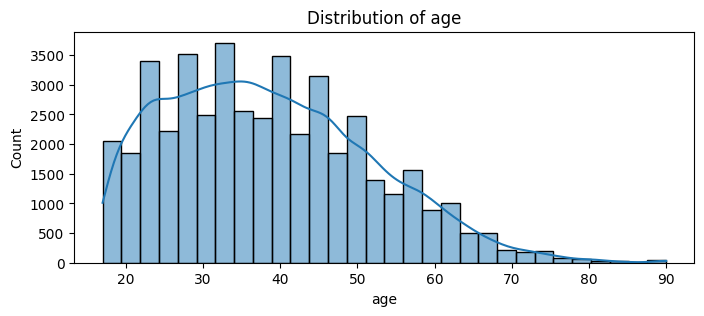

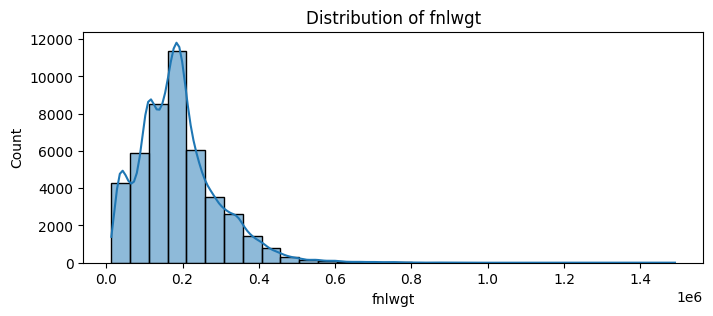

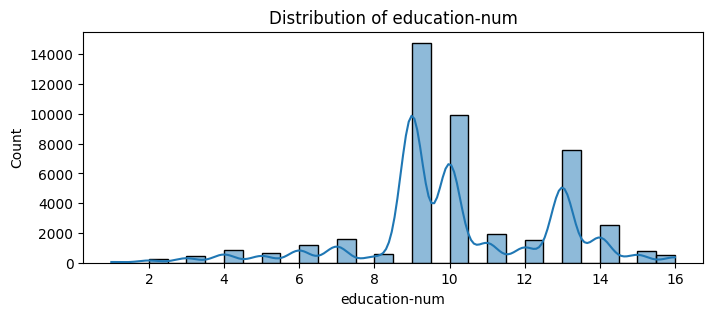

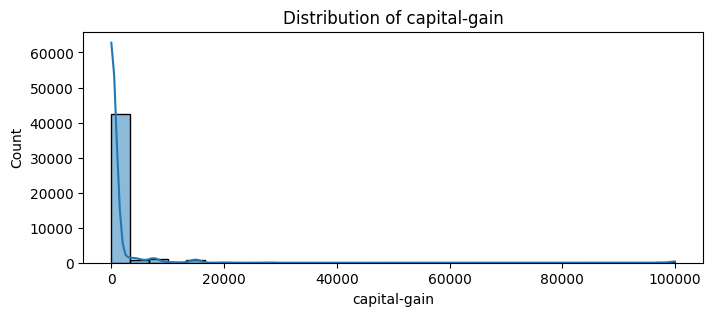

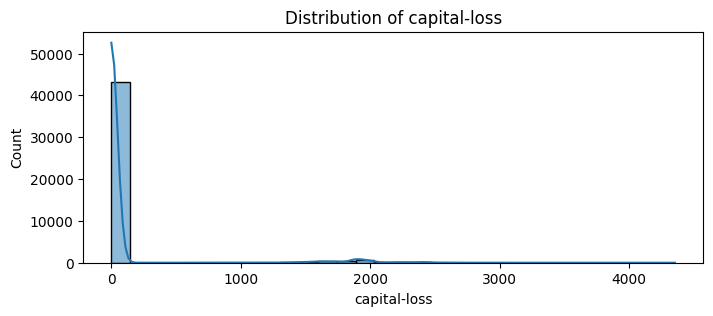

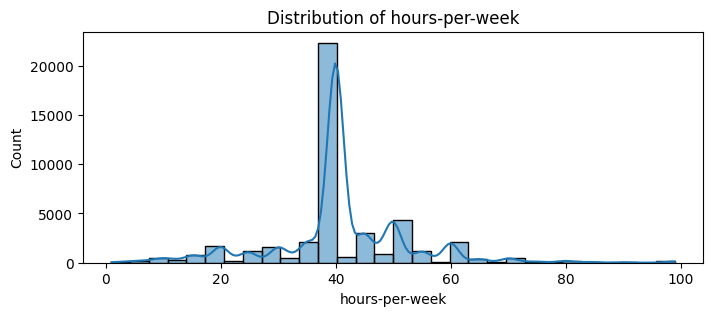

In [39]:
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 3))
    sns.histplot(df_train[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

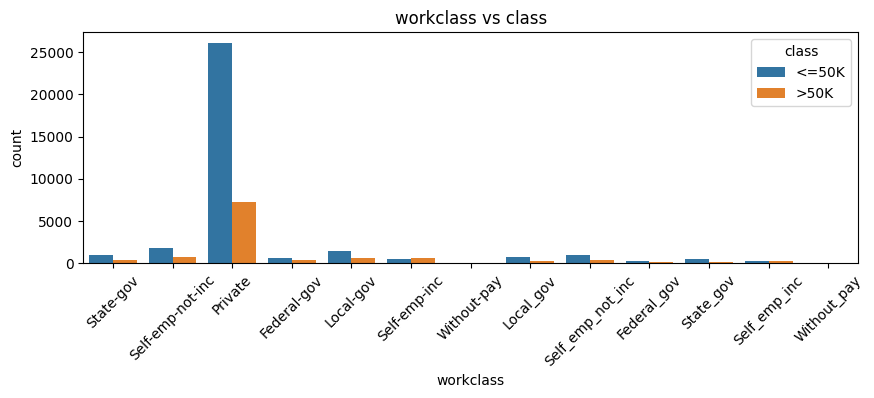

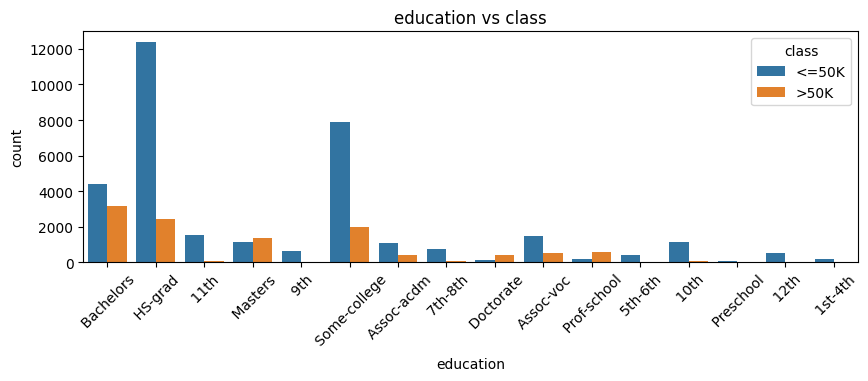

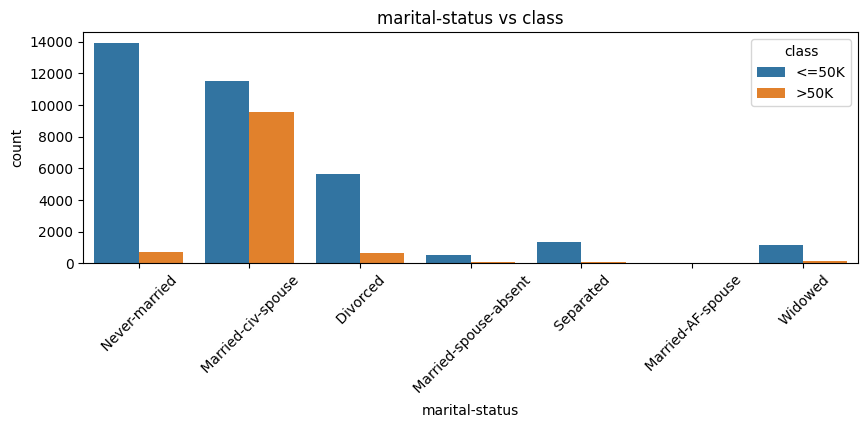

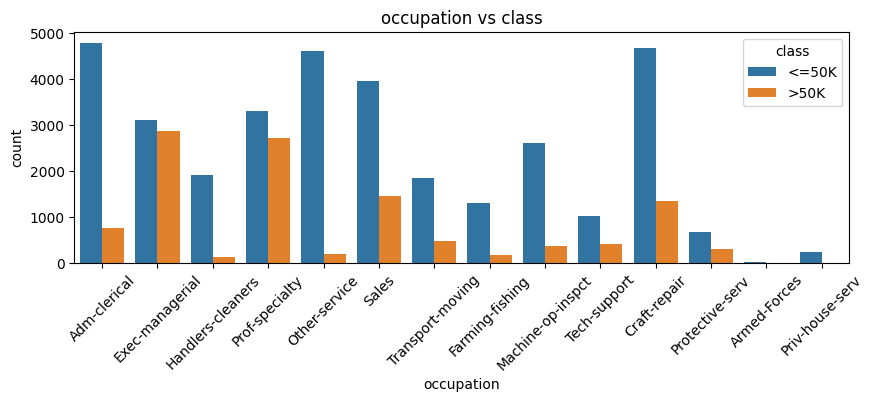

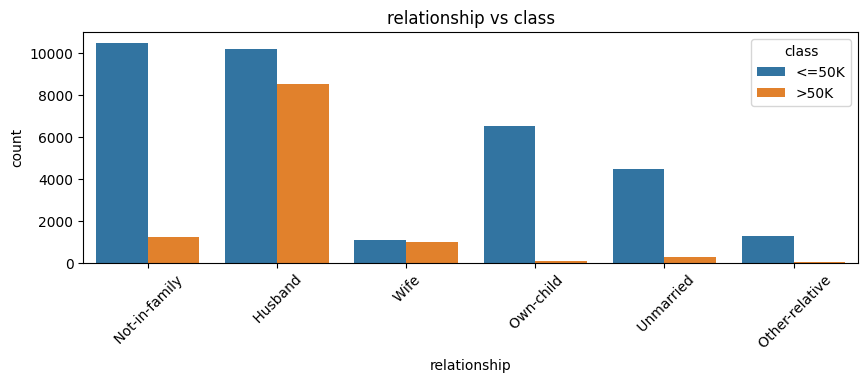

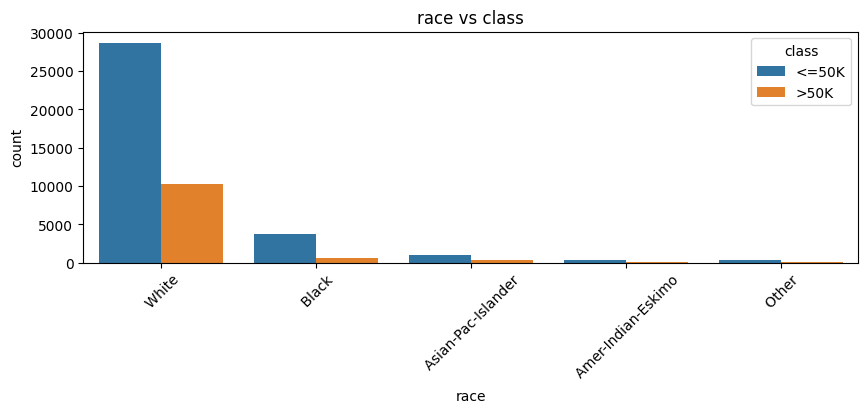

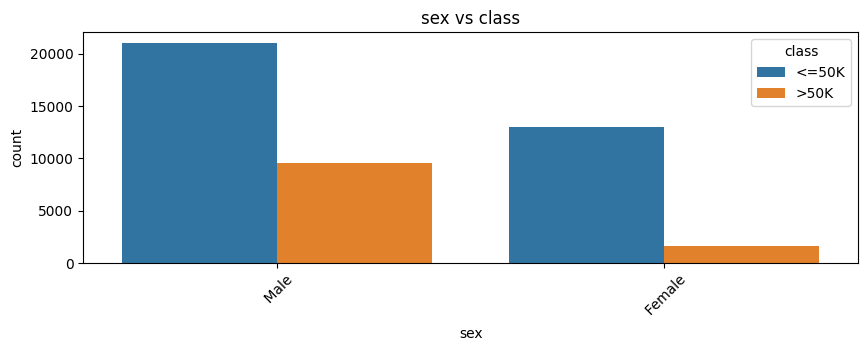

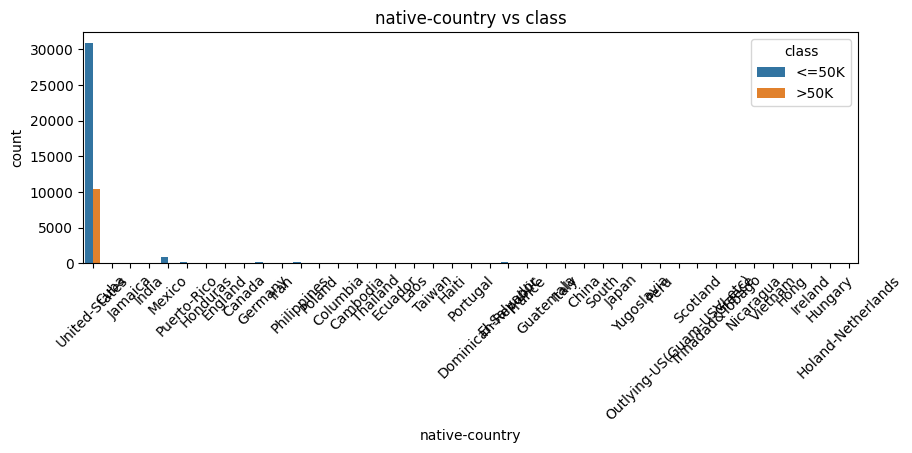

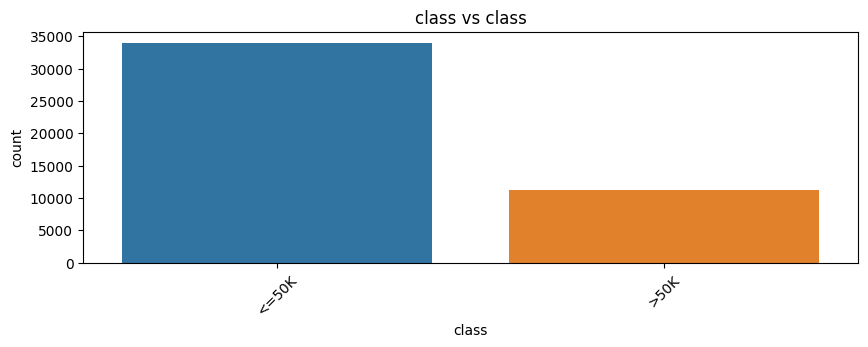

In [42]:
categorical_cols = df_train.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(10, 3))
    sns.countplot(x=col, hue='class', data=df_train)
    plt.title(f'{col} vs class')
    plt.xticks(rotation=45)
    plt.show()

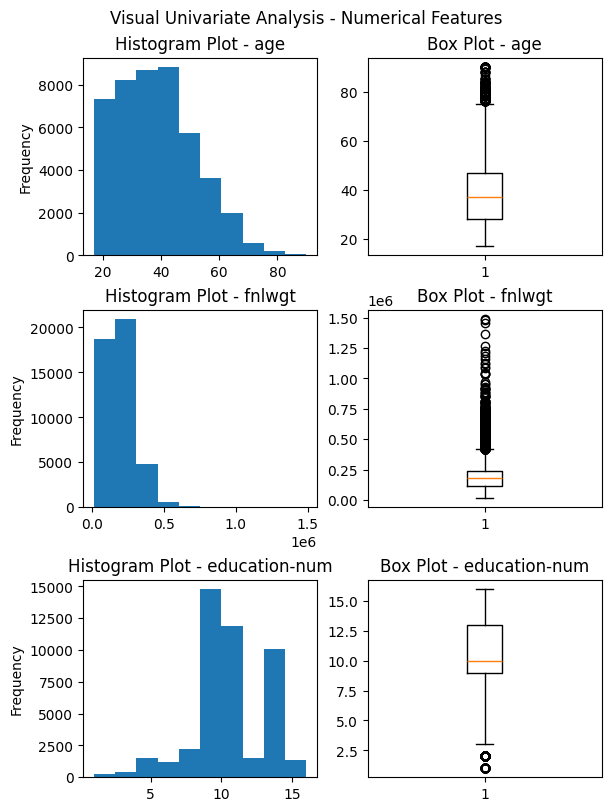

In [43]:
# Histograms and Box Plots

fig, axs = plt.subplots(3, 2, figsize=(6, 8), layout="constrained")
fig.suptitle("Visual Univariate Analysis - Numerical Features")

cols = numerical_df.columns

for idx, ax in enumerate(axs):
    col_name = cols[idx]
    ax[0].hist(df_train[col_name])
    ax[0].set_title("Histogram Plot - " + col_name)
    ax[0].set_ylabel("Frequency")
    
    ax[1].boxplot(df_train[col_name])
    ax[1].set_title("Box Plot - " + col_name)    

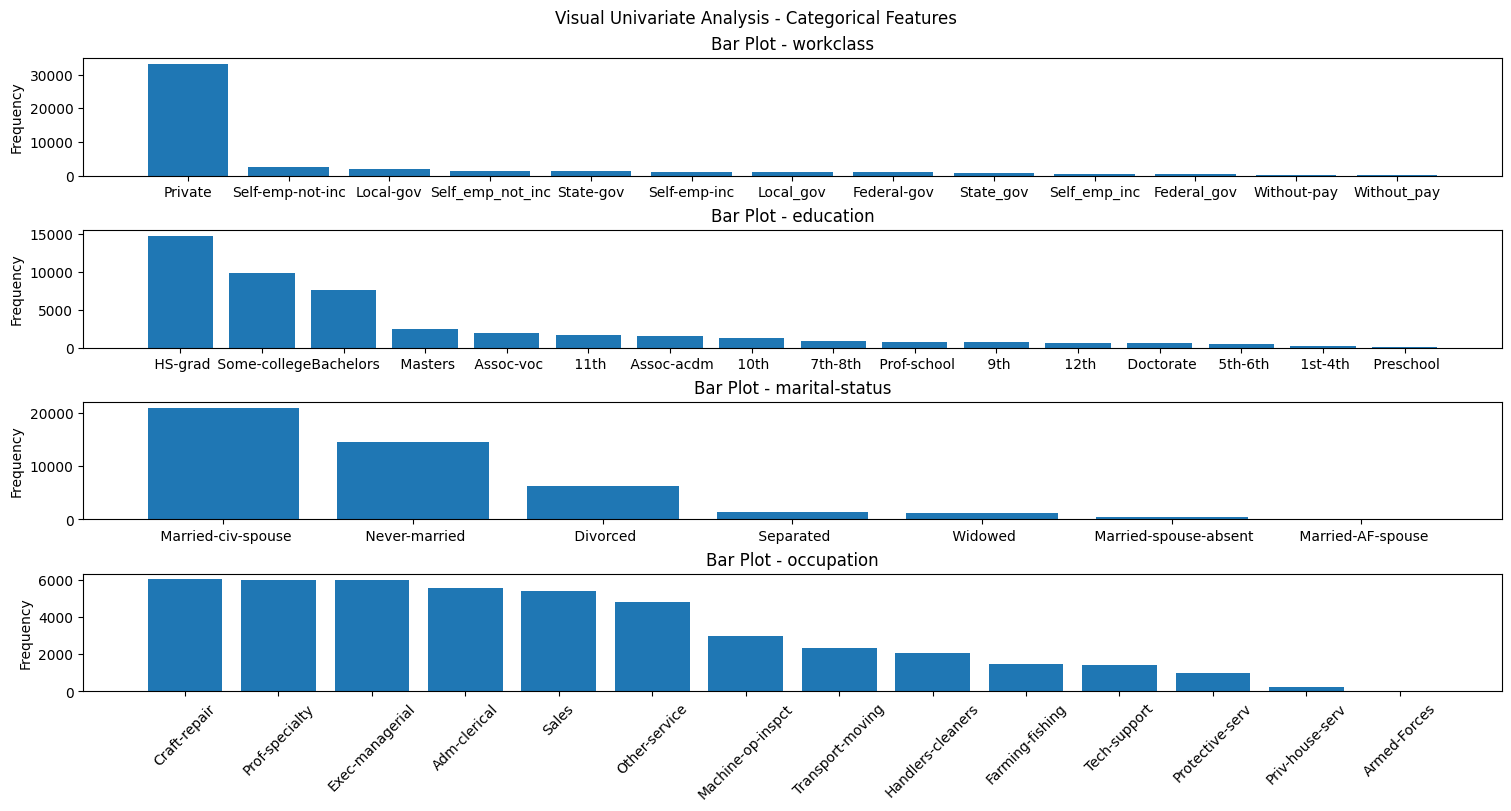

In [49]:
# Bar Plots

fig, axs = plt.subplots(4,1, figsize=(15, 8), layout="constrained")
fig.suptitle("Visual Univariate Analysis - Categorical Features")

cols = discrete_df.columns

for idx, ax in enumerate(axs.ravel()):
    col_name = cols[idx]
    data = df_train[col_name].value_counts()
    ax.bar(data.index, data.values)
    ax.set_title("Bar Plot - " + col_name)
    ax.set_ylabel("Frequency")
    plt.xticks(rotation=45)

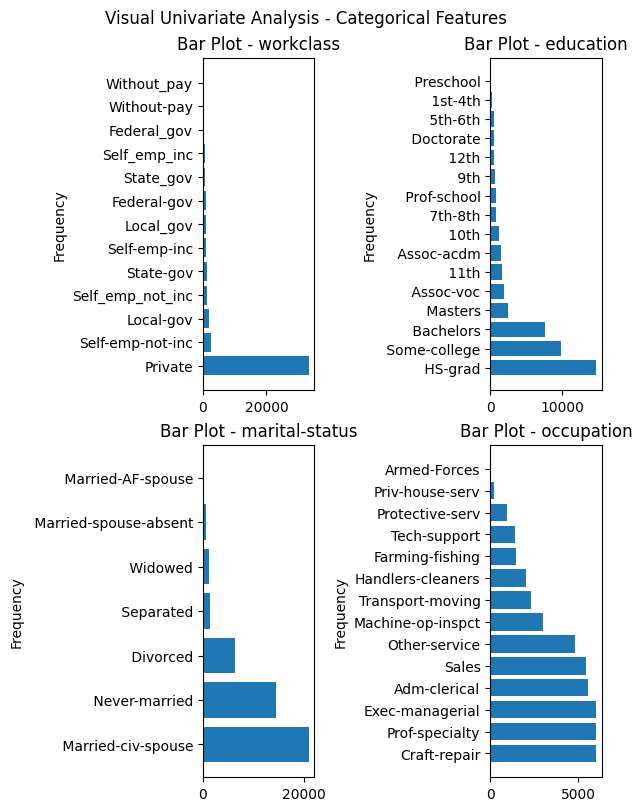

In [51]:
# Horizontal Bar Plots

fig, axs = plt.subplots(2, 2, figsize=(6, 8), layout="constrained")
fig.suptitle("Visual Univariate Analysis - Categorical Features")

cols = discrete_df.columns

for idx, ax in enumerate(axs.ravel()):
    col_name = cols[idx]
    data = df_train[col_name].value_counts()
    ax.barh(data.index, data.values)
    ax.set_title("Bar Plot - " + col_name)
    ax.set_ylabel("Frequency")

# Bivariate Analysis - Non Visual and Visual Analysis


In [52]:
numerical_df.corr()

age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.075805       0.037872      0.079934      0.059495   
fnlwgt         -0.075805  1.000000      -0.040156     -0.004254     -0.004374   
education-num   0.037872 -0.040156       1.000000      0.126393      0.081498   
capital-gain    0.079934 -0.004254       0.126393      1.000000     -0.032135   
capital-loss    0.059495 -0.004374       0.081498     -0.032135      1.000000   
hours-per-week  0.102475 -0.018277       0.145291      0.082990      0.055580   

                hours-per-week  
age                   0.102475  
fnlwgt               -0.018277  
education-num         0.145291  
capital-gain          0.082990  
capital-loss          0.055580  
hours-per-week        1.000000

In [53]:
import seaborn as sns

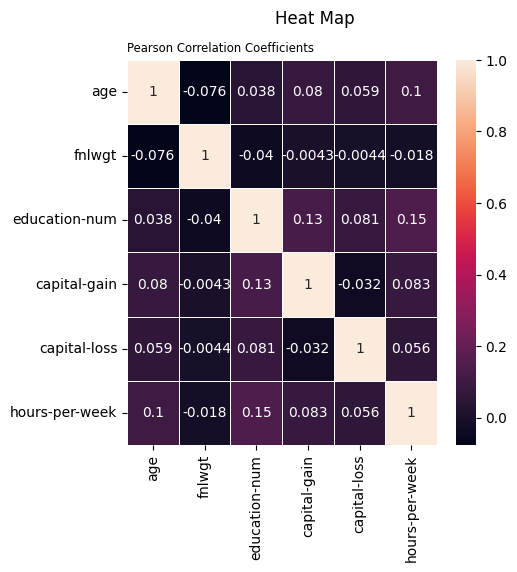

In [54]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.suptitle("Heat Map")

ax.set_title("Pearson Correlation Coefficients", loc="left", fontsize="small")
ax = sns.heatmap(numerical_df.corr(), annot=True, linewidths=0.5)

plt.show()

In [55]:
discrete_df.head()

workclass   education       marital-status          occupation  \
0         State-gov   Bachelors        Never-married        Adm-clerical   
1  Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2           Private     HS-grad             Divorced   Handlers-cleaners   
3           Private        11th   Married-civ-spouse   Handlers-cleaners   
4           Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native-country  class  
0   Not-in-family   White     Male   United-States  <=50K  
1         Husband   White     Male   United-States  <=50K  
2   Not-in-family   White     Male   United-States  <=50K  
3         Husband   Black     Male   United-States  <=50K  
4            Wife   Black   Female            Cuba  <=50K

In [56]:
tab = pd.crosstab(discrete_df['class'], discrete_df['workclass'], normalize='index')

tab

workclass  Federal-gov  Federal_gov  Local-gov  Local_gov  Never-worked  \
class                                                                     
<=50K         0.017013     0.008145   0.042633   0.021172      0.000202   
>50K          0.032481     0.016635   0.054019   0.027141      0.000000   

workclass  Never_worked   Private  Self-emp-inc  Self-emp-not-inc  \
class                                                               
<=50K          0.000087  0.765980      0.014269          0.052483   
>50K           0.000000  0.646734      0.054456          0.063386   

workclass  Self_emp_inc  Self_emp_not_inc  State-gov  State_gov  Without-pay  \
class                                                                          
<=50K          0.007597          0.027960   0.027296   0.014615     0.000404   
>50K           0.027666          0.030905   0.030905   0.015496     0.000000   

workclass  Without_pay  
class                   
<=50K         0.000144  
>50K          0.000175

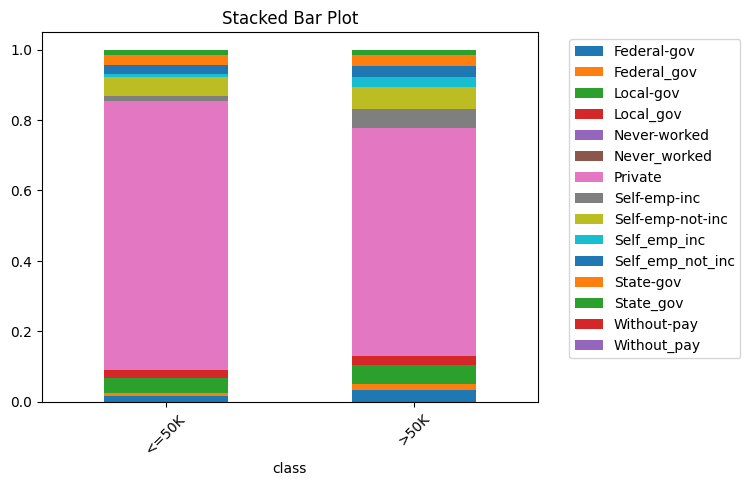

In [58]:
tab.plot(kind='bar', stacked=True)

plt.title("Stacked Bar Plot")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))

plt.show()

# Univariate Plotting For Numerical Columns - Histogram, KDE, CDF and Box Plot

In [59]:
df_train.head()

age         workclass  fnlwgt   education  education-num  \
0   39         State-gov   77516   Bachelors             13   
1   50  Self-emp-not-inc   83311   Bachelors             13   
2   38           Private  215646     HS-grad              9   
3   53           Private  234721        11th              7   
4   28           Private  338409   Bachelors             13   

        marital-status         occupation    relationship    race      sex  \
0        Never-married       Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse    Exec-managerial         Husband   White     Male   
2             Divorced  Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse  Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse     Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week native-country  class  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

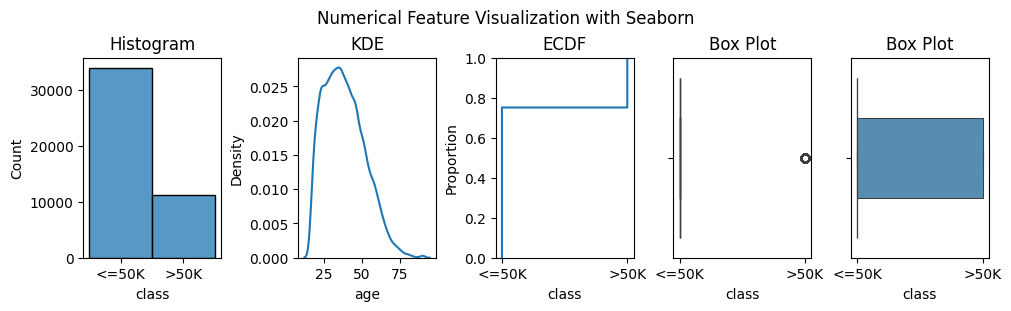

In [61]:
fig, axs = plt.subplots(1, 5, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical Feature Visualization with Seaborn")

axs[0].set_title("Histogram")
sns.histplot(data=df_train, x='class', ax=axs[0])

axs[1].set_title("KDE")
sns.kdeplot(data=df_train, x='age', ax=axs[1])

axs[2].set_title("ECDF")
sns.ecdfplot(data=df_train, x='class', ax=axs[2])

axs[3].set_title("Box Plot")
sns.boxplot(data=df_train, x='class', ax=axs[3])

axs[4].set_title("Box Plot")
sns.boxenplot(data=df_train, x='class', ax=axs[4])

plt.show()

# Univariate Plotting For Categorical Columns - Count Plot

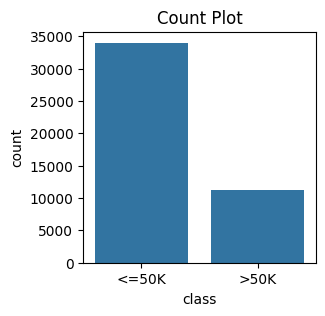

In [62]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Count Plot")
sns.countplot(data=df_train, x='class', ax=ax)

plt.show()

# Bivariate Plotting For Num vs Num Columns - Line Plot, Scatter Plot, Hexbin Plot, Heat Map and Pair Plot¶

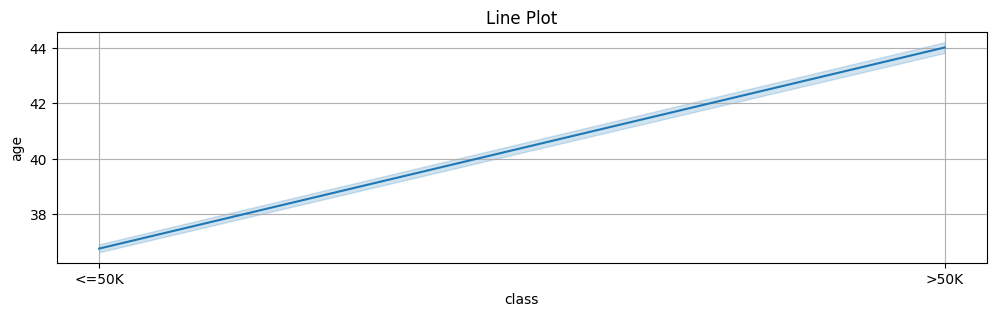

In [64]:
fig, ax = plt.subplots(figsize=(12,3))

ax.set_title("Line Plot")
sns.lineplot(data=df_train, x='class', y='age', ax=ax)

plt.grid(True)

plt.show()

In [66]:
df_train.head()

age         workclass  fnlwgt   education  education-num  \
0   39         State-gov   77516   Bachelors             13   
1   50  Self-emp-not-inc   83311   Bachelors             13   
2   38           Private  215646     HS-grad              9   
3   53           Private  234721        11th              7   
4   28           Private  338409   Bachelors             13   

        marital-status         occupation    relationship    race      sex  \
0        Never-married       Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse    Exec-managerial         Husband   White     Male   
2             Divorced  Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse  Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse     Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week native-country  class  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

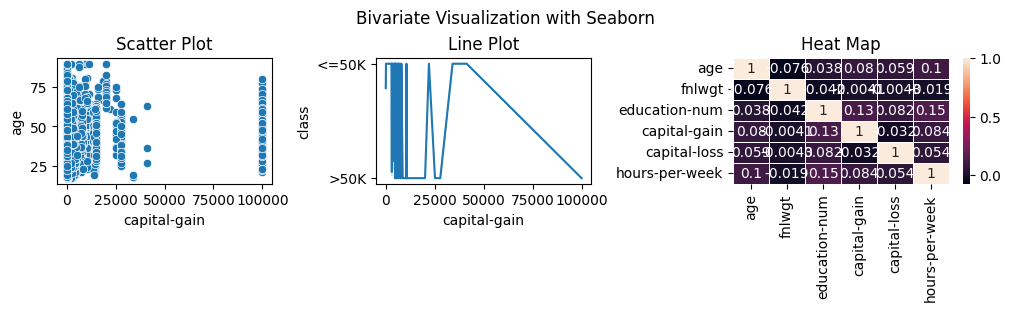

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Bivariate Visualization with Seaborn")

axs[0].set_title("Scatter Plot")
sns.scatterplot(data=df_train, x='capital-gain', y='age', ax=axs[0])

axs[1].set_title("Line Plot")
sns.lineplot(data=df_train, x='capital-gain', y='class', ax=axs[1])
axs[1].annotate("What ?", xytext=(10, 6), color="red", 
                xy=(7, 3.2), arrowprops={"arrowstyle":"->", "connectionstyle":"arc3, rad=0.3"})

axs[2].set_title("Heat Map")
sns.heatmap(df_train.select_dtypes(include=['int64', 'float64']).corr(), annot=True, linewidths=0.5, ax=axs[2])

plt.show()

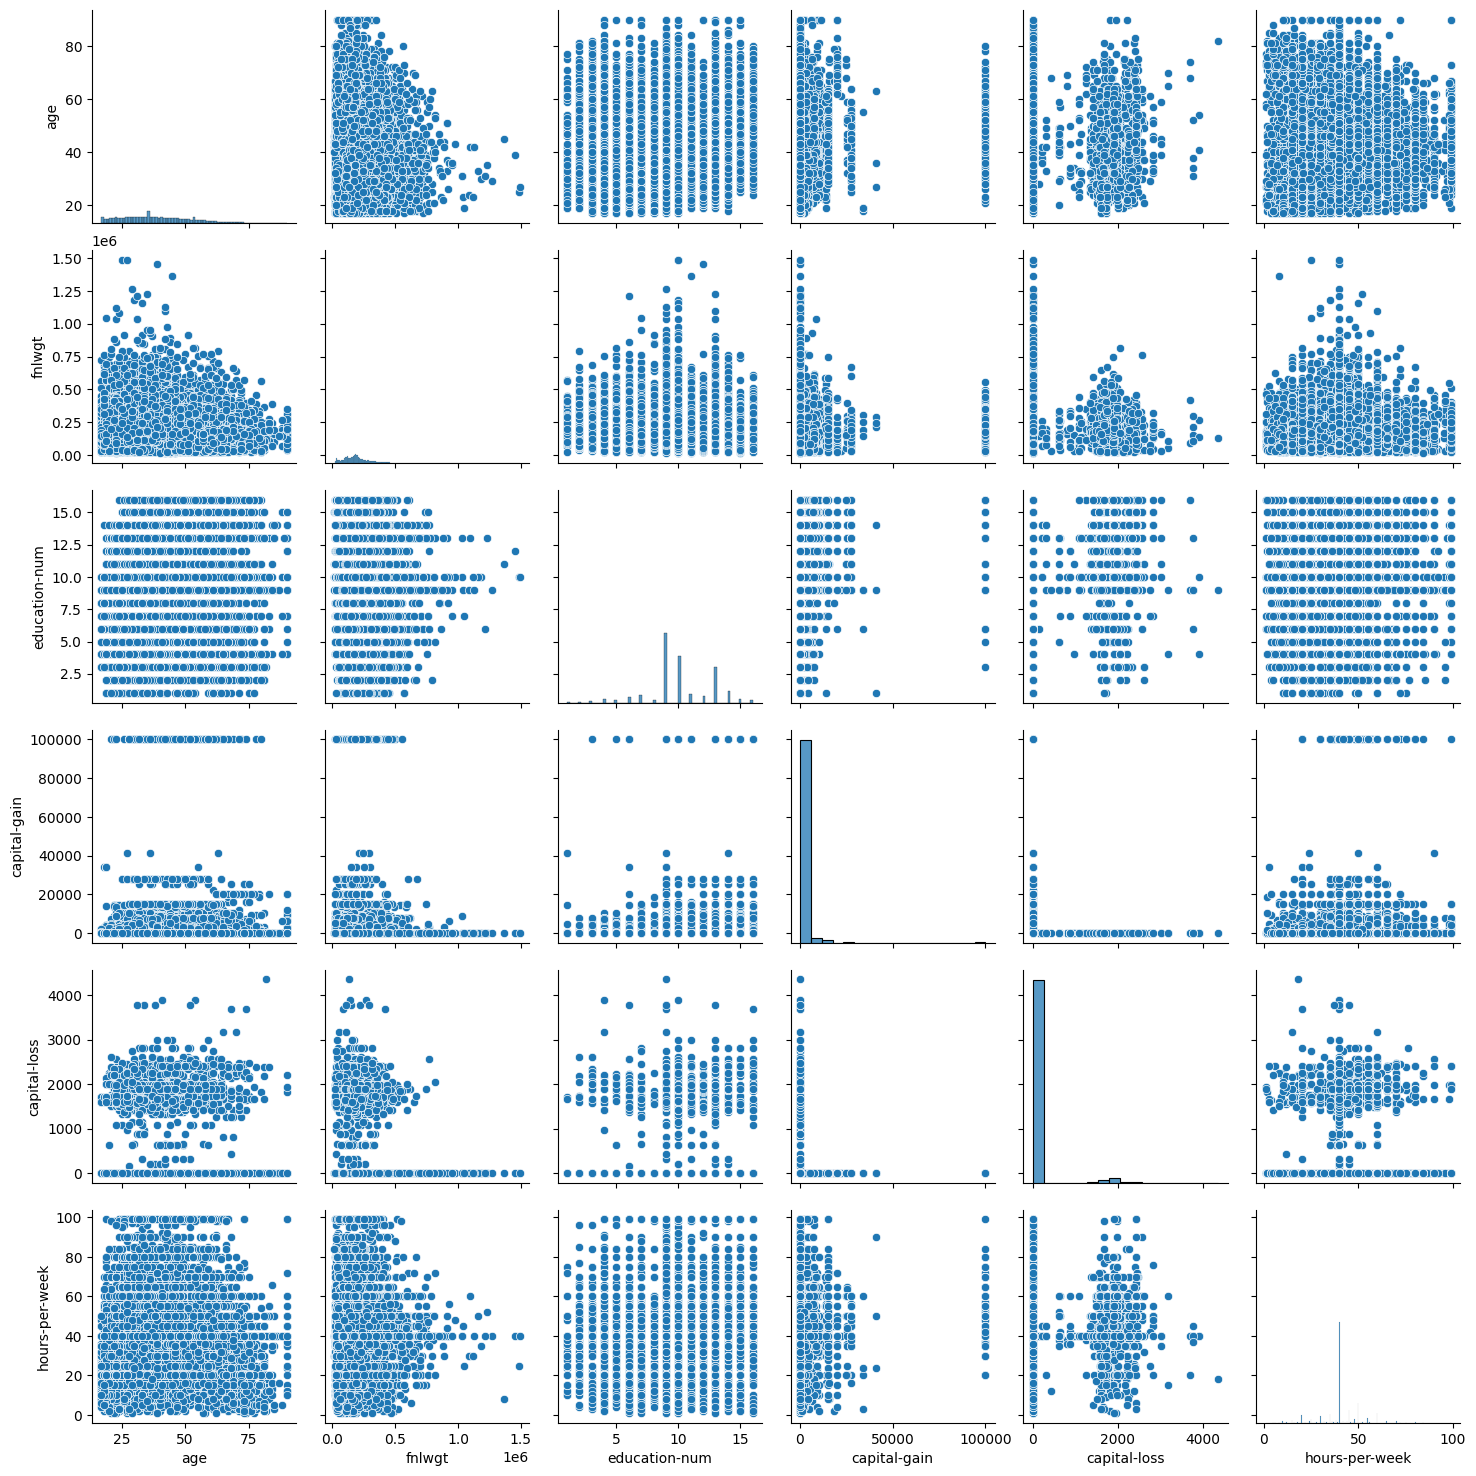

In [68]:
sns.pairplot(df_train)

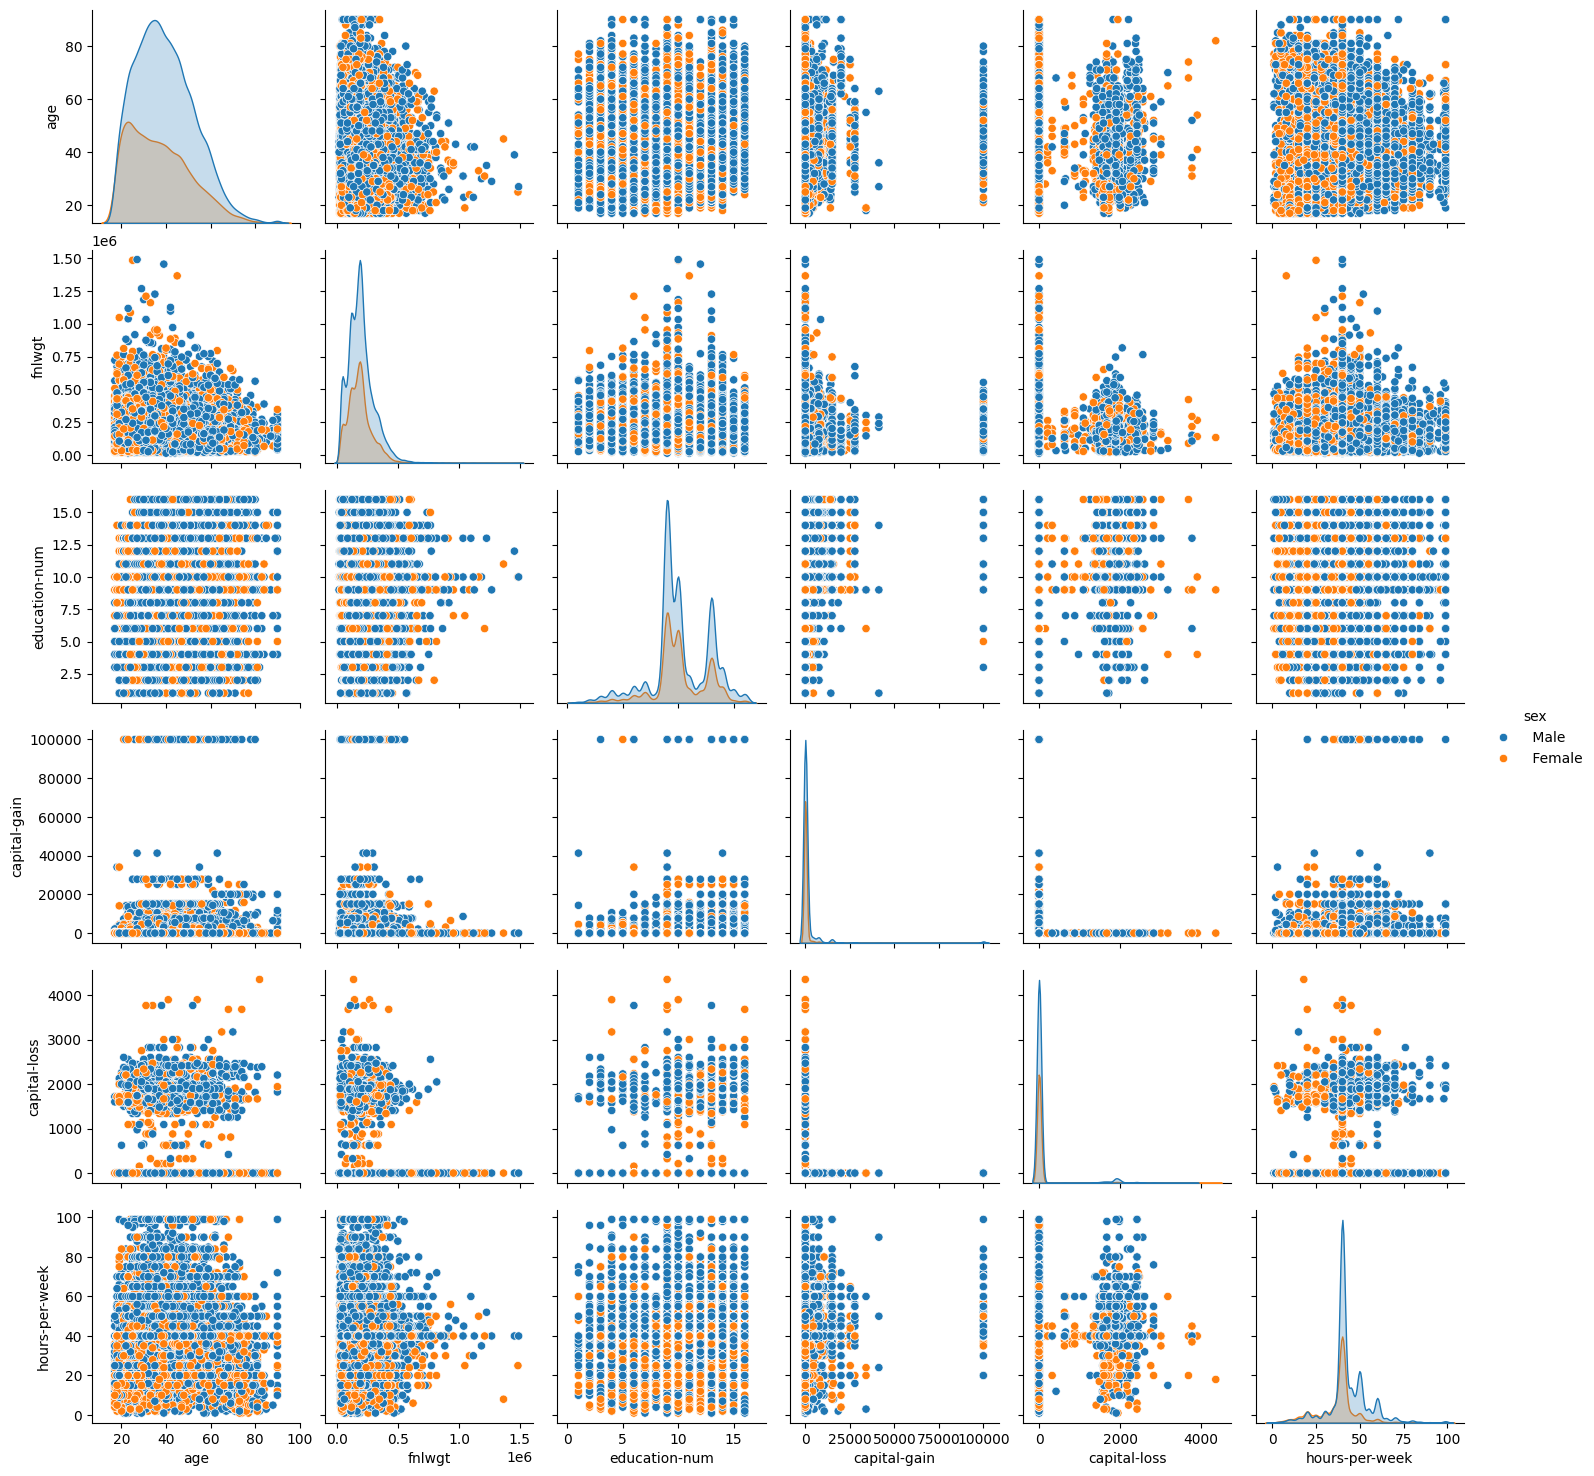

In [69]:
sns.pairplot(df_train, hue="sex")

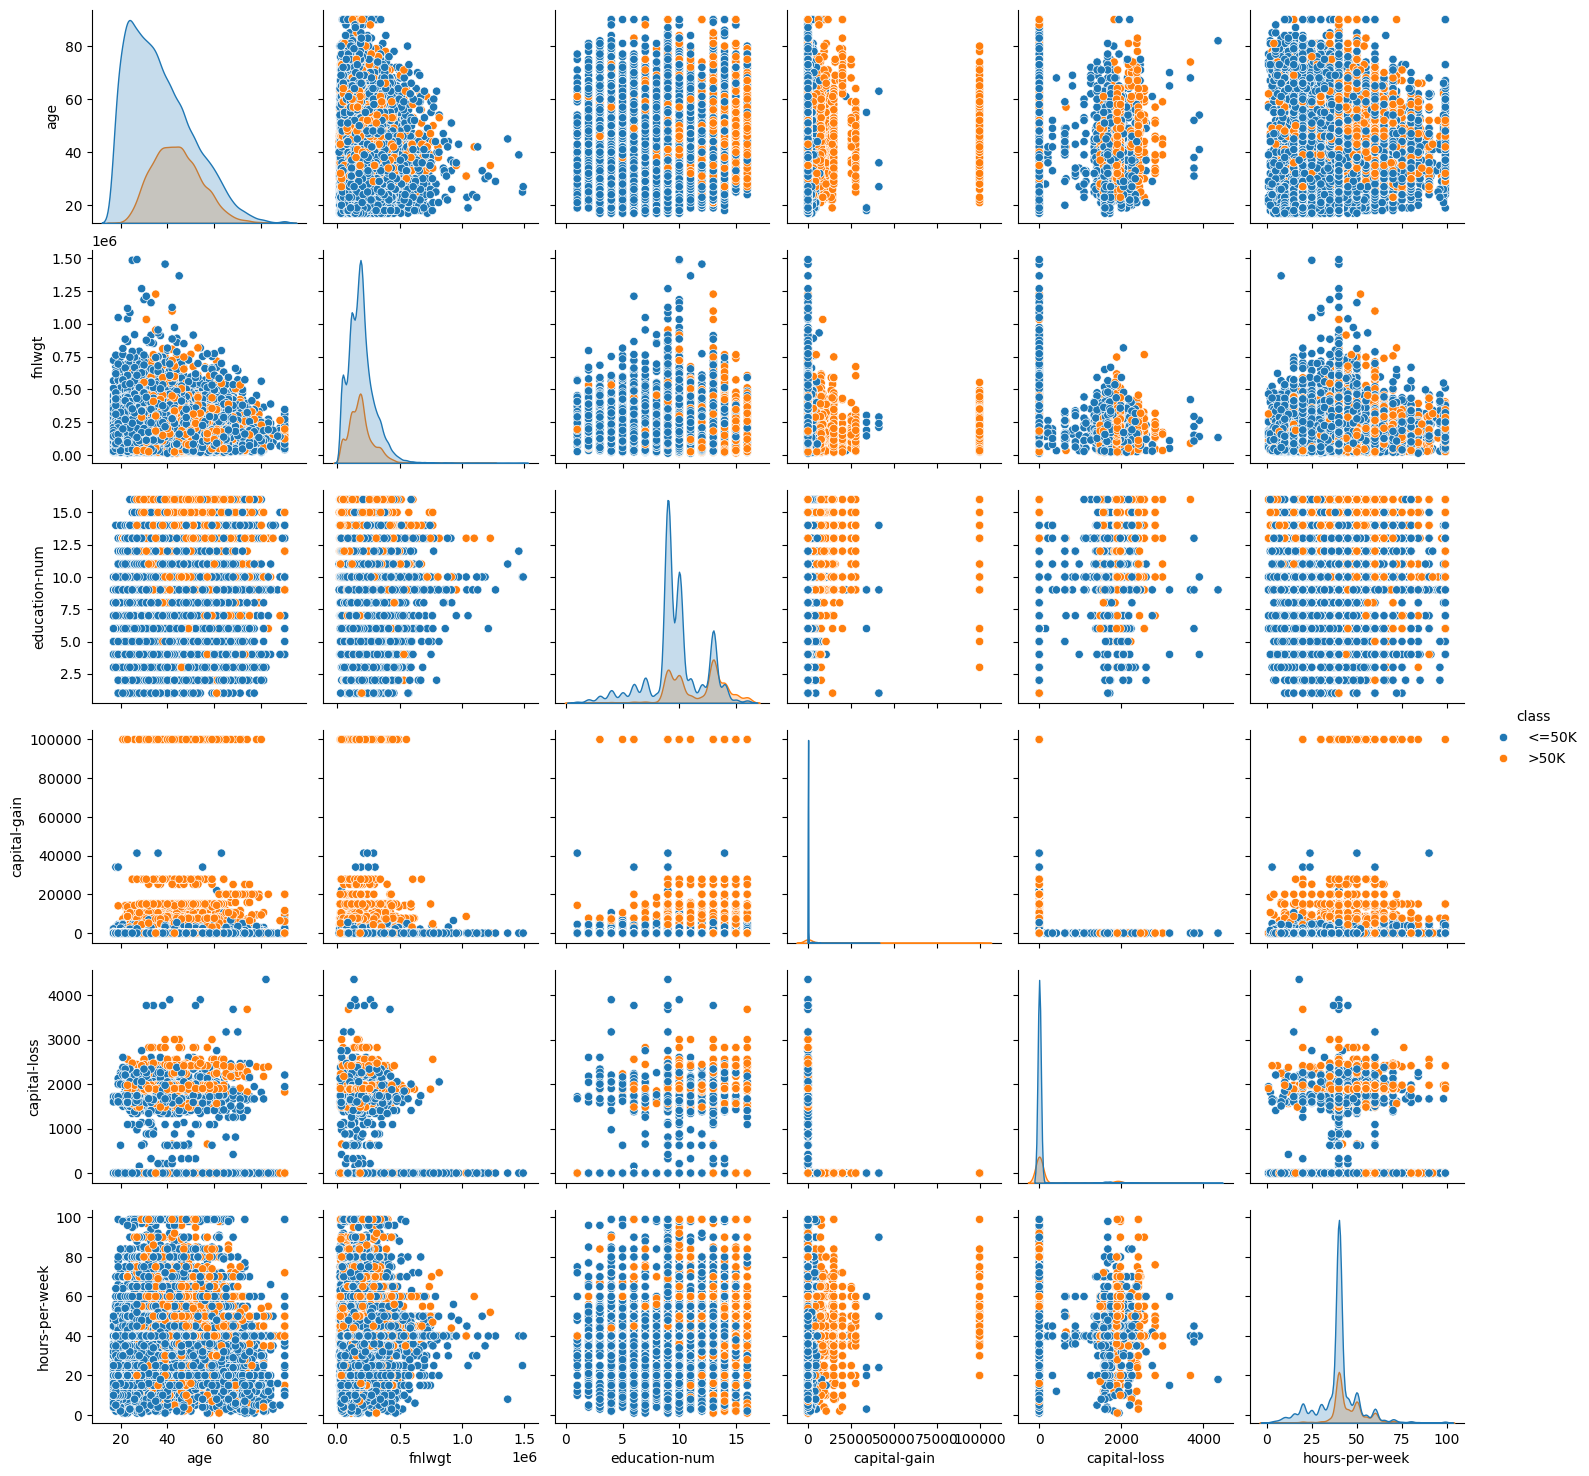

In [70]:
sns.pairplot(df_train, hue="class")

# Bivariate Plotting For Num vs Categorical Columns - Box Plot, Violin Plot, Boxen Plot and Histogram Plot

In [71]:
df_train.head()

age         workclass  fnlwgt   education  education-num  \
0   39         State-gov   77516   Bachelors             13   
1   50  Self-emp-not-inc   83311   Bachelors             13   
2   38           Private  215646     HS-grad              9   
3   53           Private  234721        11th              7   
4   28           Private  338409   Bachelors             13   

        marital-status         occupation    relationship    race      sex  \
0        Never-married       Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse    Exec-managerial         Husband   White     Male   
2             Divorced  Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse  Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse     Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week native-country  class  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

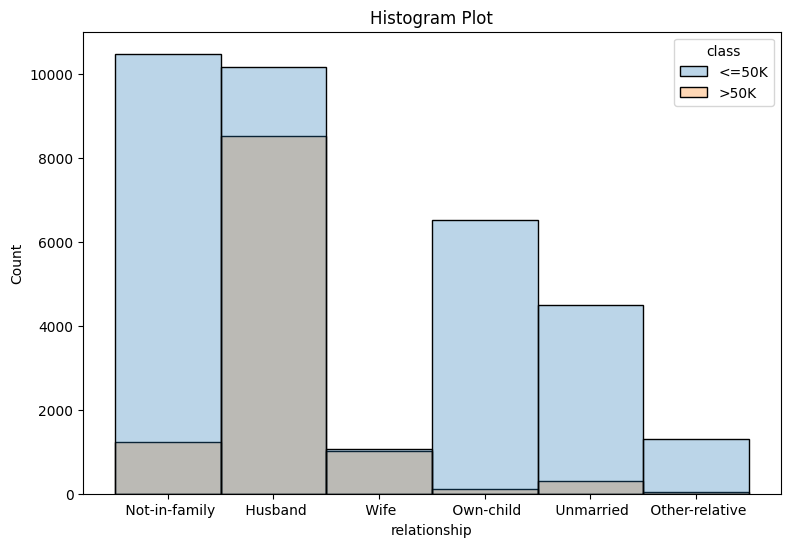

In [72]:
fig, ax = plt.subplots(figsize=(9,6))

ax.set_title("Histogram Plot")
sns.histplot(data=df_train, x='relationship', hue="class", alpha=0.3, ax=ax)

plt.show()

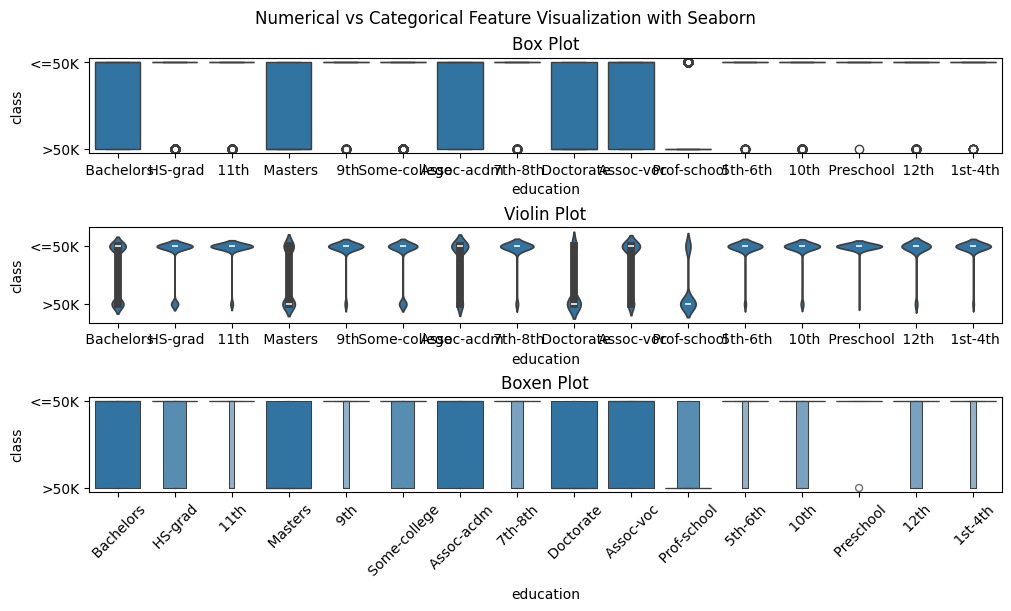

In [77]:
fig, axs = plt.subplots(3,1, figsize=(10, 6), constrained_layout=True)
fig.suptitle("Numerical vs Categorical Feature Visualization with Seaborn")

axs[0].set_title("Box Plot")
sns.boxplot(data=df_train, x='education', y='class', ax=axs[0])

axs[1].set_title("Violin Plot")
sns.violinplot(data=df_train, x='education', y='class', ax=axs[1])

axs[2].set_title("Boxen Plot")
sns.boxenplot(data=df_train, x='education', y='class', ax=axs[2])

# axs[3].set_title("Histogram Plot")
# sns.histplot(data=df_train.loc[df_train['day']=="Sat"], x='total_bill', alpha=0.3, ax=axs[3], label="Sat")
# sns.histplot(data=df_train.loc[df_train['day']=="Sun"], x='total_bill', alpha=0.3, ax=axs[3], label="Sun")
# axs[3].legend()
plt.xticks(rotation=45)
plt.show()

# Bivariate Plotting For Cat vs Categorical Columns - Grouped Count Plot


In [78]:
df_train.head()

age         workclass  fnlwgt   education  education-num  \
0   39         State-gov   77516   Bachelors             13   
1   50  Self-emp-not-inc   83311   Bachelors             13   
2   38           Private  215646     HS-grad              9   
3   53           Private  234721        11th              7   
4   28           Private  338409   Bachelors             13   

        marital-status         occupation    relationship    race      sex  \
0        Never-married       Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse    Exec-managerial         Husband   White     Male   
2             Divorced  Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse  Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse     Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week native-country  class  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

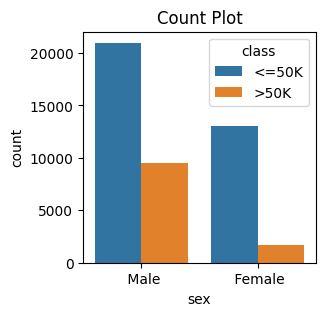

In [79]:
fig, ax = plt.subplots(figsize=(3,3))



ax.set_title("Count Plot")
sns.countplot(data=df_train, x='sex', hue='class', ax=ax)

plt.show()

# Male having more salary >50k

# Step 2: Identify input and output/target variables

In [115]:
df_train = pd.read_csv("clean_df.csv")
df_train.head()

age         workclass  fnlwgt   education  education-num  \
0   39         State-gov   77516   Bachelors             13   
1   50  Self-emp-not-inc   83311   Bachelors             13   
2   38           Private  215646     HS-grad              9   
3   53           Private  234721        11th              7   
4   28           Private  338409   Bachelors             13   

        marital-status         occupation    relationship    race      sex  \
0        Never-married       Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse    Exec-managerial         Husband   White     Male   
2             Divorced  Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse  Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse     Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week native-country  class  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [116]:
df_train.head()

age         workclass  fnlwgt   education  education-num  \
0   39         State-gov   77516   Bachelors             13   
1   50  Self-emp-not-inc   83311   Bachelors             13   
2   38           Private  215646     HS-grad              9   
3   53           Private  234721        11th              7   
4   28           Private  338409   Bachelors             13   

        marital-status         occupation    relationship    race      sex  \
0        Never-married       Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse    Exec-managerial         Husband   White     Male   
2             Divorced  Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse  Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse     Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week native-country  class  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [117]:
y = df_train.pop("class")
X = df_train

In [118]:
# !pip install scikit-learn

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(33916, 14) (33916,)
(11306, 14) (11306,)


In [120]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [121]:
X_train_cat.head()

workclass      education       marital-status         occupation  \
36418   Private      Bachelors             Divorced    Exec-managerial   
1080    Private      Assoc-voc        Never-married      Other-service   
17957   Private        HS-grad        Never-married  Machine-op-inspct   
13607   Private   Some-college        Never-married    Exec-managerial   
43125   Private        HS-grad   Married-civ-spouse       Craft-repair   

         relationship    race      sex native-country  
36418       Unmarried   White   Female  United-States  
1080    Not-in-family   White     Male  United-States  
17957   Not-in-family   White   Female  United-States  
13607   Not-in-family   White     Male  United-States  
43125         Husband   White     Male  United-States

In [122]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)
X_train_cat_tansformed.head()

workclass_Federal_gov  workclass_Local-gov  workclass_Local_gov  \
36418                    0.0                  0.0                  0.0   
1080                     0.0                  0.0                  0.0   
17957                    0.0                  0.0                  0.0   
13607                    0.0                  0.0                  0.0   
43125                    0.0                  0.0                  0.0   

       workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
36418                1.0                     0.0                         0.0   
1080                 1.0                     0.0                         0.0   
17957                1.0                     0.0                         0.0   
13607                1.0                     0.0                         0.0   
43125                1.0                     0.0                         0.0   

       workclass_Self_emp_inc  workclass_Self_emp_not_inc  \
36418                     0.0                         0.0   
1080                      0.0                         0.0   
17957                     0.0                         0.0   
13607                     0.0                         0.0   
43125                     0.0                         0.0   

       workclass_State-gov  workclass_State_gov  ...  native-country_Portugal  \
36418                  0.0                  0.0  ...                      0.0   
1080                   0.0                  0.0  ...                      0.0   
17957                  0.0                  0.0  ...                      0.0   
13607                  0.0                  0.0  ...                      0.0   
43125                  0.0                  0.0  ...                      0.0   

       native-country_Puerto-Rico  native-country_Scotland  \
36418                         0.0                      0.0   
1080                          0.0                      0.0   
17957                         0.0                      0.0   
13607                         0.0                      0.0   
43125                         0.0                      0.0   

       native-country_South  native-country_Taiwan  native-country_Thailand  \
36418                   0.0                    0.0                      0.0   
1080                    0.0                    0.0                      0.0   
17957                   0.0                    0.0                      0.0   
13607                   0.0                    0.0                      0.0   
43125                   0.0                    0.0                      0.0   

       native-country_Trinadad&Tobago  native-country_United-States  \
36418                             0.0                           1.0   
1080                              0.0                           1.0   
17957                             0.0                           1.0   
13607                             0.0                           1.0   
43125                             0.0                           1.0   

       native-country_Vietnam  native-country_Yugoslavia  
36418                     0.0                        0.0  
1080                      0.0                        0.0  
17957                     0.0                        0.0  
13607                     0.0                        0.0  
43125                     0.0                        0.0  

[5 rows x 96 columns]

In [123]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

age    fnlwgt  education-num  capital-gain  capital-loss  \
36418  0.257875 -1.361552       1.130424       -0.1478     -0.219793   
1080  -1.405799  2.110812       0.347459       -0.1478     -0.219793   
17957 -0.800827  0.068125      -0.435507       -0.1478     -0.219793   
13607 -1.103313  0.454464      -0.044024       -0.1478     -0.219793   
43125  0.182253  0.559744      -0.435507       -0.1478     -0.219793   

       hours-per-week  
36418       -0.078234  
1080        -0.915105  
17957       -0.078234  
13607        0.089140  
43125       -0.078234

In [124]:
X_train_cat_transformed = pd.DataFrame(index=X_train_cat.index)

X_train_cat_transformed.head()

Empty DataFrame
Columns: []
Index: [36418, 1080, 17957, 13607, 43125]

In [125]:
X_train_cat.head()

workclass      education       marital-status         occupation  \
36418   Private      Bachelors             Divorced    Exec-managerial   
1080    Private      Assoc-voc        Never-married      Other-service   
17957   Private        HS-grad        Never-married  Machine-op-inspct   
13607   Private   Some-college        Never-married    Exec-managerial   
43125   Private        HS-grad   Married-civ-spouse       Craft-repair   

         relationship    race      sex native-country  
36418       Unmarried   White   Female  United-States  
1080    Not-in-family   White     Male  United-States  
17957   Not-in-family   White   Female  United-States  
13607   Not-in-family   White     Male  United-States  
43125         Husband   White     Male  United-States

In [126]:
X_train_cat_transformed.head()

Empty DataFrame
Columns: []
Index: [36418, 1080, 17957, 13607, 43125]

In [127]:
from sklearn.preprocessing import LabelEncoder

# Copy the original categorical DataFrame
X_train_cat_transformed = X_train_cat.copy()

# Create a dictionary to store encoders (in case you want to reuse for test data)
label_encoders = {}

# Loop through each categorical column and apply LabelEncoder
for col in X_train_cat_transformed.columns:
    le = LabelEncoder()
    X_train_cat_transformed[col] = le.fit_transform(X_train_cat_transformed[col])
    label_encoders[col] = le  # Save encoder for use on test set


In [128]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

age    fnlwgt  education-num  capital-gain  capital-loss  \
36418  0.257875 -1.361552       1.130424       -0.1478     -0.219793   
1080  -1.405799  2.110812       0.347459       -0.1478     -0.219793   
17957 -0.800827  0.068125      -0.435507       -0.1478     -0.219793   
13607 -1.103313  0.454464      -0.044024       -0.1478     -0.219793   
43125  0.182253  0.559744      -0.435507       -0.1478     -0.219793   

       hours-per-week  workclass  education  marital-status  occupation  \
36418       -0.078234          4          9               0           3   
1080        -0.915105          4          8               4           7   
17957       -0.078234          4         11               4           6   
13607        0.089140          4         15               4           3   
43125       -0.078234          4         11               2           2   

       relationship  race  sex  native-country  
36418             4     4    0              38  
1080              1     4    1              38  
17957             1     4    0              38  
13607             1     4    1              38  
43125             0     4    1              38

In [129]:
# X_train_cat.workclass.value_counts()

In [130]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [131]:
classifier.feature_importances_

array([0.12339247, 0.20288905, 0.11329041, 0.11467887, 0.0388545 ,
       0.06888966, 0.03887513, 0.00947969, 0.00626892, 0.05589348,
       0.20169368, 0.01067826, 0.00243506, 0.01268082])

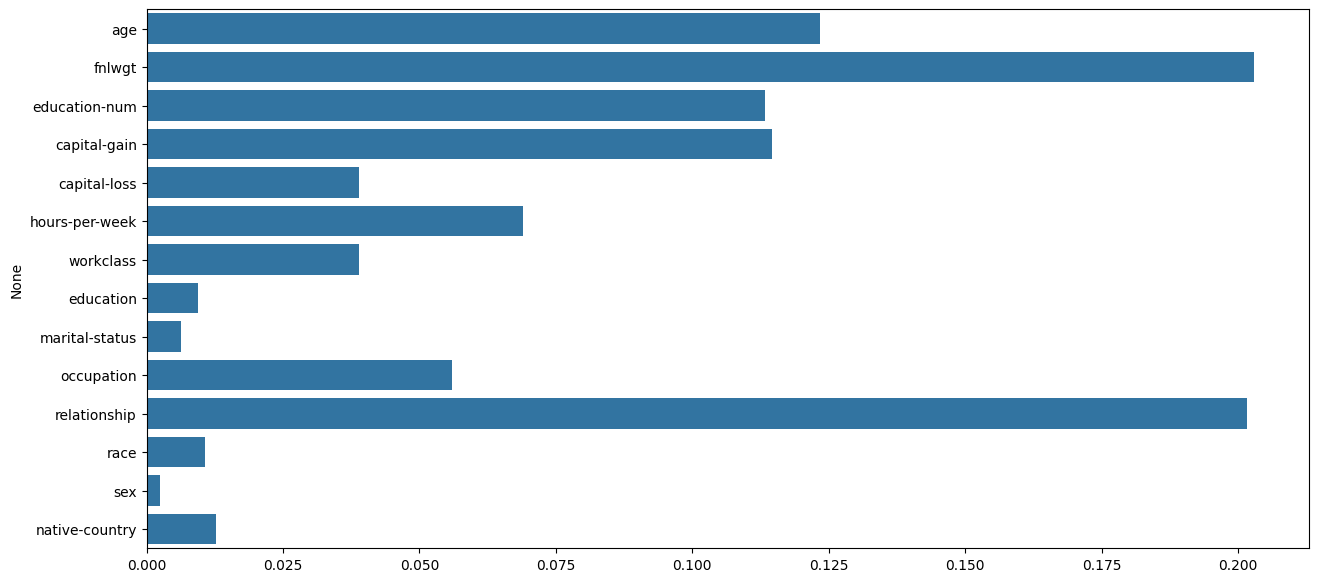

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))

sns.barplot(x=classifier.feature_importances_, y=X_train_transformed.columns)

plt.show()


In [133]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_tansformed], axis=1)

X_train_transformed.head()

age    fnlwgt  education-num  capital-gain  capital-loss  \
36418  0.257875 -1.361552       1.130424       -0.1478     -0.219793   
1080  -1.405799  2.110812       0.347459       -0.1478     -0.219793   
17957 -0.800827  0.068125      -0.435507       -0.1478     -0.219793   
13607 -1.103313  0.454464      -0.044024       -0.1478     -0.219793   
43125  0.182253  0.559744      -0.435507       -0.1478     -0.219793   

       hours-per-week  workclass_Federal_gov  workclass_Local-gov  \
36418       -0.078234                    0.0                  0.0   
1080        -0.915105                    0.0                  0.0   
17957       -0.078234                    0.0                  0.0   
13607        0.089140                    0.0                  0.0   
43125       -0.078234                    0.0                  0.0   

       workclass_Local_gov  workclass_Private  ...  native-country_Portugal  \
36418                  0.0                1.0  ...                      0.0   
1080                   0.0                1.0  ...                      0.0   
17957                  0.0                1.0  ...                      0.0   
13607                  0.0                1.0  ...                      0.0   
43125                  0.0                1.0  ...                      0.0   

       native-country_Puerto-Rico  native-country_Scotland  \
36418                         0.0                      0.0   
1080                          0.0                      0.0   
17957                         0.0                      0.0   
13607                         0.0                      0.0   
43125                         0.0                      0.0   

       native-country_South  native-country_Taiwan  native-country_Thailand  \
36418                   0.0                    0.0                      0.0   
1080                    0.0                    0.0                      0.0   
17957                   0.0                    0.0                      0.0   
13607                   0.0                    0.0                      0.0   
43125                   0.0                    0.0                      0.0   

       native-country_Trinadad&Tobago  native-country_United-States  \
36418                             0.0                           1.0   
1080                              0.0                           1.0   
17957                             0.0                           1.0   
13607                             0.0                           1.0   
43125                             0.0                           1.0   

       native-country_Vietnam  native-country_Yugoslavia  
36418                     0.0                        0.0  
1080                      0.0                        0.0  
17957                     0.0                        0.0  
13607                     0.0                        0.0  
43125                     0.0                        0.0  

[5 rows x 102 columns]

In [134]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [135]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

age    fnlwgt  education-num  capital-gain  capital-loss  \
41387 -1.178934 -0.994780       0.738941       -0.1478     -0.219793   
35278 -0.422719  0.510892      -0.435507       -0.1478     -0.219793   
26950  0.031010 -0.276367      -0.044024       -0.1478     -0.219793   
29133  0.409118  0.114728      -1.218472       -0.1478     -0.219793   
41794 -0.573962 -0.296407      -0.435507       -0.1478     -0.219793   

       hours-per-week  
41387        0.340201  
35278        1.177072  
26950       -0.245608  
29133       -0.078234  
41794       -0.078234

In [136]:
X_test_cat_tansformed = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_test_cat.index)
X_test_cat_tansformed.head()

workclass_Federal_gov  workclass_Local-gov  workclass_Local_gov  \
41387                    0.0                  0.0                  0.0   
35278                    0.0                  0.0                  0.0   
26950                    0.0                  0.0                  0.0   
29133                    0.0                  0.0                  0.0   
41794                    0.0                  0.0                  0.0   

       workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
41387                1.0                     0.0                         0.0   
35278                1.0                     0.0                         0.0   
26950                1.0                     0.0                         0.0   
29133                1.0                     0.0                         0.0   
41794                1.0                     0.0                         0.0   

       workclass_Self_emp_inc  workclass_Self_emp_not_inc  \
41387                     0.0                         0.0   
35278                     0.0                         0.0   
26950                     0.0                         0.0   
29133                     0.0                         0.0   
41794                     0.0                         0.0   

       workclass_State-gov  workclass_State_gov  ...  native-country_Portugal  \
41387                  0.0                  0.0  ...                      0.0   
35278                  0.0                  0.0  ...                      0.0   
26950                  0.0                  0.0  ...                      0.0   
29133                  0.0                  0.0  ...                      0.0   
41794                  0.0                  0.0  ...                      0.0   

       native-country_Puerto-Rico  native-country_Scotland  \
41387                         0.0                      0.0   
35278                         0.0                      0.0   
26950                         0.0                      0.0   
29133                         0.0                      0.0   
41794                         0.0                      0.0   

       native-country_South  native-country_Taiwan  native-country_Thailand  \
41387                   0.0                    0.0                      0.0   
35278                   0.0                    0.0                      0.0   
26950                   0.0                    0.0                      0.0   
29133                   0.0                    0.0                      0.0   
41794                   0.0                    0.0                      0.0   

       native-country_Trinadad&Tobago  native-country_United-States  \
41387                             0.0                           0.0   
35278                             0.0                           1.0   
26950                             0.0                           1.0   
29133                             0.0                           1.0   
41794                             0.0                           1.0   

       native-country_Vietnam  native-country_Yugoslavia  
41387                     0.0                        0.0  
35278                     0.0                        0.0  
26950                     0.0                        0.0  
29133                     0.0                        0.0  
41794                     0.0                        0.0  

[5 rows x 96 columns]

In [137]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_tansformed], axis=1)

X_test_transformed.head()

age    fnlwgt  education-num  capital-gain  capital-loss  \
41387 -1.178934 -0.994780       0.738941       -0.1478     -0.219793   
35278 -0.422719  0.510892      -0.435507       -0.1478     -0.219793   
26950  0.031010 -0.276367      -0.044024       -0.1478     -0.219793   
29133  0.409118  0.114728      -1.218472       -0.1478     -0.219793   
41794 -0.573962 -0.296407      -0.435507       -0.1478     -0.219793   

       hours-per-week  workclass_Federal_gov  workclass_Local-gov  \
41387        0.340201                    0.0                  0.0   
35278        1.177072                    0.0                  0.0   
26950       -0.245608                    0.0                  0.0   
29133       -0.078234                    0.0                  0.0   
41794       -0.078234                    0.0                  0.0   

       workclass_Local_gov  workclass_Private  ...  native-country_Portugal  \
41387                  0.0                1.0  ...                      0.0   
35278                  0.0                1.0  ...                      0.0   
26950                  0.0                1.0  ...                      0.0   
29133                  0.0                1.0  ...                      0.0   
41794                  0.0                1.0  ...                      0.0   

       native-country_Puerto-Rico  native-country_Scotland  \
41387                         0.0                      0.0   
35278                         0.0                      0.0   
26950                         0.0                      0.0   
29133                         0.0                      0.0   
41794                         0.0                      0.0   

       native-country_South  native-country_Taiwan  native-country_Thailand  \
41387                   0.0                    0.0                      0.0   
35278                   0.0                    0.0                      0.0   
26950                   0.0                    0.0                      0.0   
29133                   0.0                    0.0                      0.0   
41794                   0.0                    0.0                      0.0   

       native-country_Trinadad&Tobago  native-country_United-States  \
41387                             0.0                           0.0   
35278                             0.0                           1.0   
26950                             0.0                           1.0   
29133                             0.0                           1.0   
41794                             0.0                           1.0   

       native-country_Vietnam  native-country_Yugoslavia  
41387                     0.0                        0.0  
35278                     0.0                        0.0  
26950                     0.0                        0.0  
29133                     0.0                        0.0  
41794                     0.0                        0.0  

[5 rows x 102 columns]

In [138]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Classifier = KNeighborsClassifier()

Classifier.fit(X_train_transformed, y_train)

y_test_pred = Classifier.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy}')

C:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", l

Accuracy: 0.83407040509464


# LOGISTIC REGRESSION

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.8505218468070052
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      8567
        >50K       0.73      0.61      0.66      2739

    accuracy                           0.85     11306
   macro avg       0.80      0.77      0.78     11306
weighted avg       0.84      0.85      0.85     11306



# DECISION TREE

✅ Accuracy: 0.8125773925349372

✅ Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      8567
        >50K       0.61      0.63      0.62      2739

    accuracy                           0.81     11306
   macro avg       0.74      0.75      0.75     11306
weighted avg       0.81      0.81      0.81     11306



C:\Users\prana\AppData\Local\Temp\ipykernel_424\1157130795.py:30: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


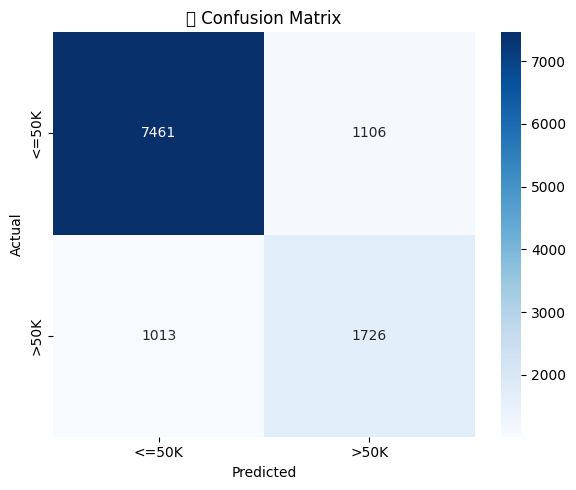

C:\Users\prana\AppData\Local\Temp\ipykernel_424\1157130795.py:50: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


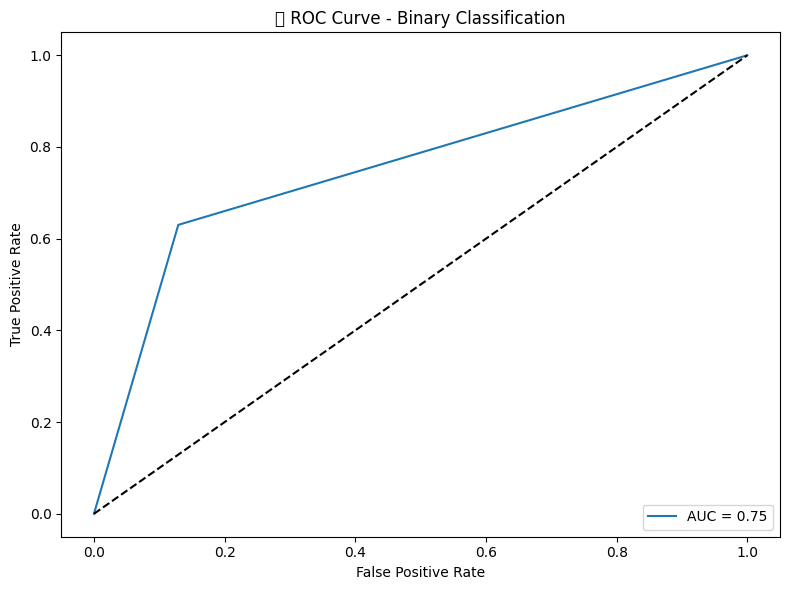

✅ ROC AUC Score: 0.75


In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, 
    confusion_matrix, roc_curve, roc_auc_score
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train the Decision Tree model
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

# Predict classes and probabilities
y_test_pred = classifier.predict(X_test_transformed)
y_test_proba = classifier.predict_proba(X_test_transformed)

# 1. Accuracy and Classification Report
print("✅ Accuracy:", accuracy_score(y_test, y_test_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_test_pred))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title("✅ Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 3. ROC Curve and AUC
classes = classifier.classes_
n_classes = len(classes)

if n_classes == 2:
    # Binary classification
    y_test_bin = label_binarize(y_test, classes=classes)
    fpr, tpr, _ = roc_curve(y_test_bin, y_test_proba[:, 1])
    roc_auc = roc_auc_score(y_test_bin, y_test_proba[:, 1])

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("✅ ROC Curve - Binary Classification")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    print(f"✅ ROC AUC Score: {roc_auc:.2f}")

else:
    # Multiclass classification
    y_test_bin = label_binarize(y_test, classes=classes)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
        roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_test_proba[:, i])

    plt.figure(figsize=(10, 7))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("✅ ROC Curve - Multiclass Classification")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    # Overall AUC
    overall_auc = roc_auc_score(y_test_bin, y_test_proba, multi_class='ovr')
    print(f"✅ Overall ROC AUC (OvR): {overall_auc:.2f}")


# RANDOM FOREST

✅ Accuracy: 0.852821510702282

✅ Classification Report:
               precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      8567
        >50K       0.72      0.63      0.68      2739

    accuracy                           0.85     11306
   macro avg       0.81      0.78      0.79     11306
weighted avg       0.85      0.85      0.85     11306



C:\Users\prana\AppData\Local\Temp\ipykernel_424\3616056001.py:34: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


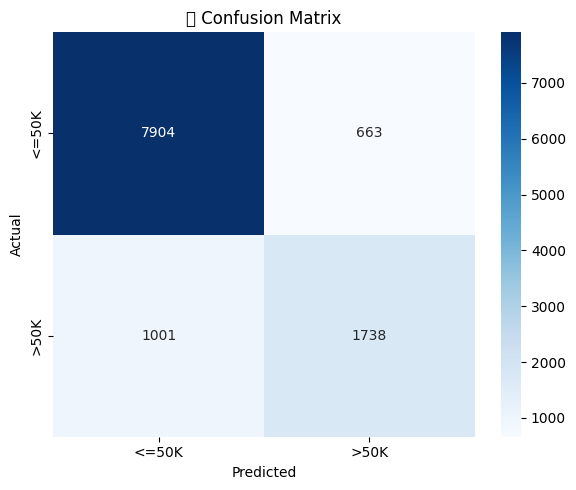

C:\Users\prana\AppData\Local\Temp\ipykernel_424\3616056001.py:52: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


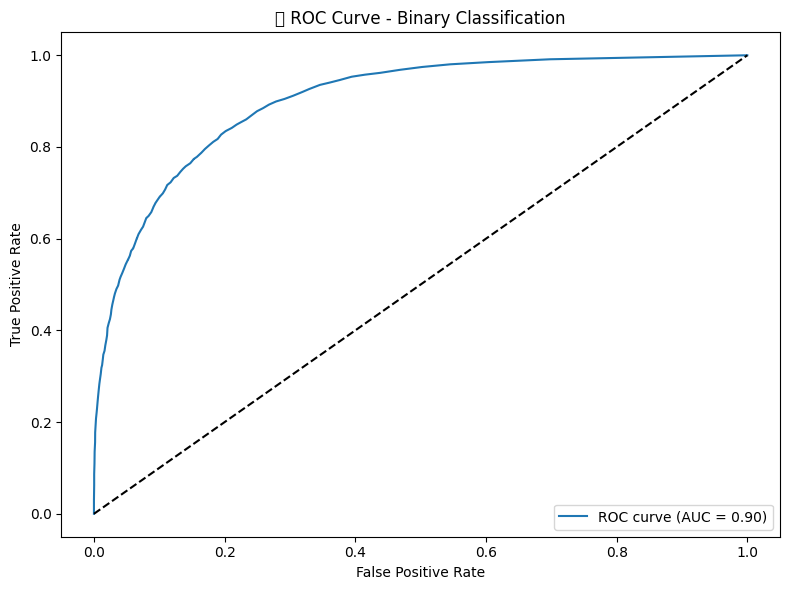

✅ ROC AUC Score: 0.90


In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, roc_auc_score
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train the Random Forest model
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_transformed, y_train)

# Predict class labels and probabilities
y_test_pred = classifier.predict(X_test_transformed)
y_test_proba = classifier.predict_proba(X_test_transformed)

# Classes and count
classes = classifier.classes_
n_classes = len(classes)

# ✅ Accuracy and classification report
print("✅ Accuracy:", accuracy_score(y_test, y_test_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_test_pred))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred, labels=classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title("✅ Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ✅ ROC Curve and AUC
if n_classes == 2:
    # Binary classification
    y_test_bin = label_binarize(y_test, classes=classes).ravel()
    fpr, tpr, _ = roc_curve(y_test_bin, y_test_proba[:, 1])
    roc_auc = roc_auc_score(y_test_bin, y_test_proba[:, 1])

    # Plot ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("✅ ROC Curve - Binary Classification")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    print(f"✅ ROC AUC Score: {roc_auc:.2f}")

else:
    # Multiclass classification
    y_test_bin = label_binarize(y_test, classes=classes)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
        roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_test_proba[:, i])

    # Plot all ROC curves
    plt.figure(figsize=(10, 7))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("✅ ROC Curve - Multiclass (Random Forest)")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    # Overall ROC AUC
    overall_auc = roc_auc_score(y_test_bin, y_test_proba, multi_class='ovr')
    print(f"✅ Overall ROC AUC (OvR): {overall_auc:.2f}")


# Model Compare 

KNN Accuracy: 0.83407040509464
KNN Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      8567
        >50K       0.67      0.62      0.64      2739

    accuracy                           0.83     11306
   macro avg       0.78      0.76      0.77     11306
weighted avg       0.83      0.83      0.83     11306

Logistic Regression Accuracy: 0.8505218468070052
Logistic Regression Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      8567
        >50K       0.73      0.61      0.66      2739

    accuracy                           0.85     11306
   macro avg       0.80      0.77      0.78     11306
weighted avg       0.84      0.85      0.85     11306

Decision Tree Accuracy: 0.8093047939147355
Decision Tree Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      8567
       

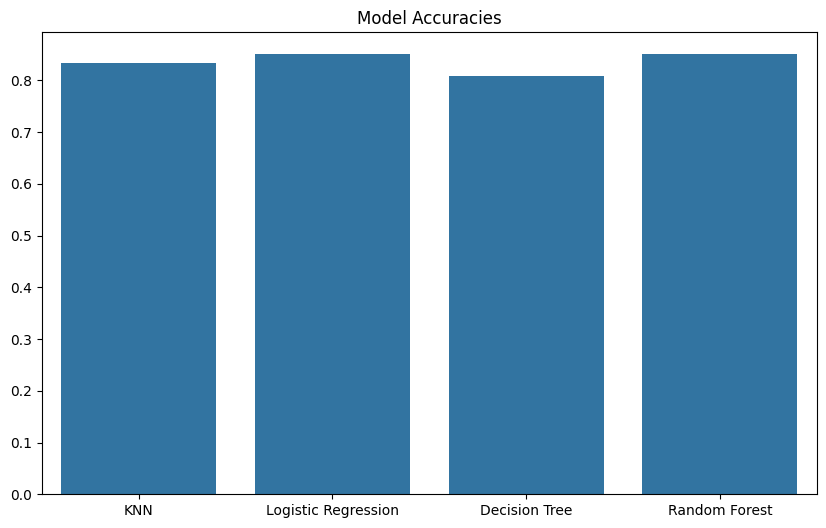

The best algorithm for Prediction is: Random Forest


In [153]:
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    # Add other classifiers here
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_test_pred = model.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, y_test_pred)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy}')

    # Print additional metrics for classification models
    if hasattr(model, 'predict_proba'):
        y_test_proba = model.predict_proba(X_test_transformed)
        # Additional metrics for classification models
        print(f'{name} Classification Report:\n{classification_report(y_test, y_test_pred)}')

# Display a plot showing accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Accuracies')
plt.show()

# Find the best model based on accuracy
best_model = max(results, key=results.get)
print(f'The best algorithm for Prediction is: {best_model}')


# Metrics Comapre


KNN Metrics:
Accuracy: 0.834
Precision: 0.830
Recall: 0.834
F1-Score: 0.832
ROC AUC: 0.862

Logistic Regression Metrics:
Accuracy: 0.851
Precision: 0.845
Recall: 0.851
F1-Score: 0.846
ROC AUC: 0.903

Decision Tree Metrics:
Accuracy: 0.811
Precision: 0.813
Recall: 0.811
F1-Score: 0.812
ROC AUC: 0.748

Random Forest Metrics:
Accuracy: 0.854
Precision: 0.849
Recall: 0.854
F1-Score: 0.850
ROC AUC: 0.902


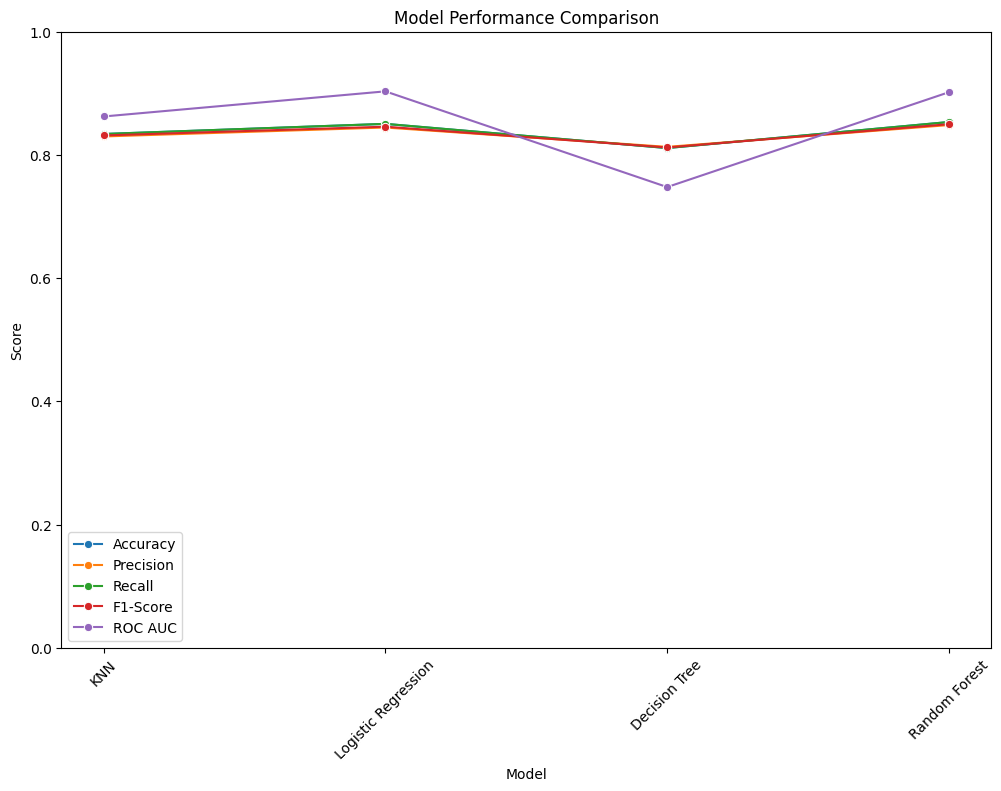

In [154]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    # Add other classifiers here
}

# Prepare a dictionary to store metrics for each model
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC AUC': []
}

for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_test_pred = model.predict(X_test_transformed)
    
    # Basic metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
    
    # ROC AUC (only if predict_proba exists and problem is binary or multiclass)
    if hasattr(model, 'predict_proba'):
        y_test_proba = model.predict_proba(X_test_transformed)
        # Binarize y_test for multiclass AUC calculation
        classes = model.classes_
        from sklearn.preprocessing import label_binarize
        y_test_bin = label_binarize(y_test, classes=classes)
        
        # For binary classification, roc_auc_score can be simpler
        if y_test_bin.shape[1] == 1:  # Binary
            roc_auc = roc_auc_score(y_test, y_test_proba[:, 1])
        else:  # Multiclass
            roc_auc = roc_auc_score(y_test_bin, y_test_proba, multi_class='ovr')
    else:
        roc_auc = None

    # Save metrics
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    results['ROC AUC'].append(roc_auc)
    
    print(f"\n{name} Metrics:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.3f}")
    else:
        print("ROC AUC: N/A (model does not support predict_proba)")

import pandas as pd

# Convert results dict to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Plot metrics comparison (Accuracy, Precision, Recall, F1-Score, ROC AUC)
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']

plt.figure(figsize=(12, 8))
for metric in metrics_to_plot:
    sns.lineplot(data=results_df, x='Model', y=metric, marker='o', label=metric)

plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend()
plt.xticks(rotation=45)
plt.show()
